In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#%matplotlib inline

In [2]:
digits_data=np.loadtxt("digits.csv",delimiter=",")

In [26]:
def test_train_split(X,testsize):
    target=np.copy(X[:,-1])
    classes=list(np.unique(target))
    train=np.empty((1,X.shape[1]))
    test=np.empty((1,X.shape[1]))
    for i in classes:
        rows,columns=X[target==i].shape
        seed=np.random.choice(rows,size=int(rows*(1-testsize)),replace=False)
        train=np.append(train,X[target==i][seed,:],axis=0)
        test=np.append(test,np.delete(X[target==i],seed,axis=0),axis=0)
    train=train[1:,:]
    test=test[1:,:]
    np.random.shuffle(train)
    np.random.shuffle(test)
    return train[:,:-1],train[:,-1], test[:,:-1],test[:,-1]

In [4]:
def logit_fun(W,X):
    p= 1.0 / (1.0 + np.exp(-X.dot(W)))
    return p

In [5]:
def log_likelihood(W,X,target):
    p=logit_fun(W,X)
    rows, columns = X.shape
    log_likelihood=target*np.log(p+1e-24) + (1.0-target)*np.log(1.0- p+1e-24)
    return -1.0 * (log_likelihood.sum()) /rows

In [6]:
def gradient_descent(X,step_size,target):
    X=np.insert(X,0,1,axis=1)
    rows, columns = X.shape
    W=np.zeros((X.shape[1],1))
    Wtemp=np.zeros((X.shape[1],1))
    target=target.reshape(target.shape[0],1)
    epsilon=0.0001
    progress=0.01
    iteration = 0
    init_cost = log_likelihood(W, X, target)
    while(iteration<=5000) & (progress >= epsilon ):
        Wtemp=np.copy(W)
        p=logit_fun(W,X)
        gradient = ((target-p).T.dot(X)).T /rows
        W = W + step_size*gradient
        f_W =log_likelihood(W,X,target)
        f_W_temp=log_likelihood(Wtemp,X,target)
        progress=np.abs(f_W_temp-f_W)
        iteration = iteration + 1
    return W

In [7]:
def Normalize(X):
    mean_x = X.mean(axis=0)
    std_x = X.std(axis=0)
    std_x[std_x==0]=np.random.normal(0,0.0001)
    X = (X-mean_x)/std_x
    return(X)

In [8]:
def Logistic_Regression(Xtest,Xtrain,ytrain):
    classes=np.unique(digits_data[:,-1])
    Xtrain = Normalize(Xtrain)
    Xtest = Normalize(Xtest)
    p=np.zeros((Xtest.shape[0],len(classes)))
    for y in classes:
        ytemp=np.copy(ytrain)
        ytemp[ytrain==y]=1
        ytemp[ytrain!=y]=0
        W=gradient_descent(Xtrain,0.005,ytemp)
        prob=list(logit_fun(W,np.insert(Xtest,0,1,axis=1)))
        p[:,y]=prob
    yhat=np.argsort(p,axis=1)[:,p.shape[1]-1]
    return yhat

In [9]:
def accuracy(ytest,yhat):
    right=float((yhat==ytest).sum())
    accuracy=right/float(ytest.shape[0])
    return accuracy

In [10]:
def learning_curve(Xtrain,Xtest,ytrain,func):
    accu=[]
    for i in [0.1,0.25,0.5,0.75,1]:
        rows,columns=Xtrain.shape
        seed=np.random.choice(rows,size=int(rows*i),replace=False)
        xtrain=Xtrain[seed,:]
        target=ytrain[seed]
        accu.append(accuracy(ytest,func(Xtest,xtrain,target)))
    return accu        

In [13]:
#Logistic Digits
p=[]
for i in range(0,10):
    Xtrain,ytrain,Xtest,ytest=test_train_split(digits_data,0.2)
    p.append(learning_curve(Xtrain,Xtest,ytrain,Logistic_Regression))
p_logistic=np.asarray(p)

In [39]:
print "Digits Error"
print np.mean(list(1-np.array(p_logistic)),axis=0)
print "Standard Deveation"
print np.std(list(1-np.array(p_logistic)),axis=0)

Digits Error
[ 0.14175824  0.08956044  0.07527473  0.06840659  0.06373626]
Standard Deveation
[ 0.03054767  0.00887665  0.01153846  0.00970912  0.00958   ]


In [17]:
boston_data=np.loadtxt("boston.csv",delimiter=",")

In [18]:
boston_data_50=np.copy(boston_data)
boston_data_75=np.copy(boston_data)
boston_data_50[:,-1]=(boston_data_50[:,-1]>=np.median(boston_data_50[:,-1])).astype(int)
boston_data_75[:,-1]=(boston_data_75[:,-1]>=np.percentile(boston_data_75[:,-1],75)).astype(int)

In [19]:
#Logistic Boston 50
p_boston_50=[]
for i in range(0,10):
    Xtrain,ytrain,Xtest,ytest=test_train_split(boston_data_50,0.2)
    p.append(learning_curve(Xtrain,Xtest,ytrain,Logistic_Regression))
p_boston_50=np.asarray(p)

In [36]:
print "Boston 50 Error"
print np.mean(list(1-np.array(p_boston_50)),axis=0)
print "Standard Deveation"
print np.std(list(1-np.array(p_boston_50)),axis=0)

Boston 50 Error
[ 0.160585    0.13742728  0.12930403  0.12832094  0.12549558]
Standard Deveation
[ 0.03802982  0.05205586  0.05863415  0.06400236  0.06598957]


In [27]:
#Logistic Boston 75
p_boston_75=[]
for i in range(0,10):
    Xtrain,ytrain,Xtest,ytest=test_train_split(boston_data_75,0.2)
    p.append(learning_curve(Xtrain,Xtest,ytrain,Logistic_Regression))
p_boston_75=np.asarray(p)

In [38]:
print "Boston 75 Error"
print np.mean(list(1-np.array(p_boston_75)),axis=0)
print "Standard Deveation"
print np.std(list(1-np.array(p_boston_75)),axis=0)

Boston 75 Error
[ 0.15725329  0.12557638  0.1163677   0.11367028  0.1117674 ]
Standard Deveation
[ 0.04508095  0.04254001  0.04524606  0.05007405  0.05104965]


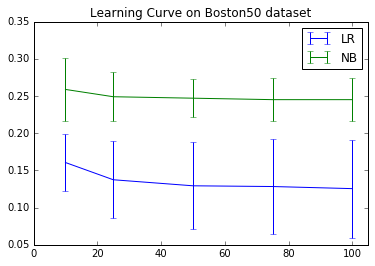

In [50]:
x = [10, 25, 50, 75, 100]
y0 = np.mean(list(1-np.array(p_boston_50)),axis=0)
y1 = [ 0.25882353,  0.24901961,  0.24705882,  0.24509804,  0.24509804]
std0 = np.std(list(1-np.array(p_boston_50)),axis=0)
std1 = [ 0.0418709,  0.03286873, 0.02586452,  0.02875074,  0.02875074]
t0 = plt.errorbar(x, y0, std0, label='LR')
t1 = plt.errorbar(x, y1, std1, label='NB')
plt.xlim(0, 105)
plt.title('Learning Curve on Boston50 dataset')
plt.legend()
plt.savefig("Learning_Curve_Boston_50.png")
plt.show()

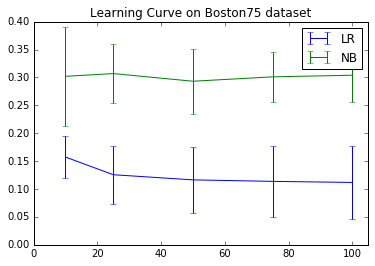

In [52]:
x = [10, 25, 50, 75, 100]
y0 = np.mean(list(1-np.array(p_boston_75)),axis=0)
y1 = [ 0.30196078,  0.30686275,  0.29313725,  0.30098039,  0.30392157]
std0 = np.std(list(1-np.array(p_boston_50)),axis=0)
std1 = [ 0.08918875,  0.05298655,  0.05807531,  0.04493791,  0.04822892]
t0 = plt.errorbar(x, y0, std0, label='LR')
t1 = plt.errorbar(x, y1, std1, label='NB')
plt.xlim(0, 105)
plt.title('Learning Curve on Boston75 dataset')
plt.legend()
plt.savefig("Learning_Curve_Boston_75.png")
plt.show()

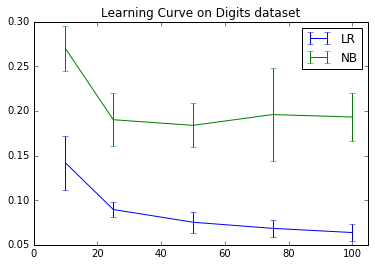

In [51]:
x = [10, 25, 50, 75, 100]
y0 = np.mean(list(1-np.array(p_logistic)),axis=0)
y1 = [ 0.26978022,  0.19010989,  0.18379121,  0.19587912,  0.19313187]
std0 = np.std(list(1-np.array(p_logistic)),axis=0)
std1 = [ 0.02511296,  0.02986303,  0.02452452,  0.05227077,  0.02686274]
t0 = plt.errorbar(x, y0, std0, label='LR')
t1 = plt.errorbar(x, y1, std1, label='NB')
plt.xlim(0, 105)
plt.title('Learning Curve on Digits dataset')
plt.legend()
plt.savefig("Learning_Curve_Digits.png")
plt.show()